# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Daniel Weißen (427 492)
    
    2. Felix Meyer (378 959)
    
    3.

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [1]:
import pandas as pd

flights_data = pd.read_csv('./dataset.csv')
sampled_data = flights_data.sample(frac=0.95, random_state=427492)

sampled_data.head()

,Unnamed: 0,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY
441342,441342,88967,2015,12,29,2,UA,499,NaN,RSW,...,1,B,NaN,NaN,NaN,NaN,NaN,363,51,Night
599886,599886,436145,2015,1,8,4,OO,5340,N943SW,DEN,...,0,N,56.0,0.0,0.0,0.0,0.0,8,1,Evening
163677,163677,930878,2015,3,9,1,WN,817,N455WN,MKE,...,0,N,0.0,0.0,2.0,21.0,0.0,68,9,Evening
544987,544987,870830,2015,3,3,2,MQ,3126,N813MQ,EVV,...,0,N,22.0,0.0,0.0,103.0,0.0,62,8,Afternoon
307254,307254,437807,2015,9,16,3,AA,1867,N758US,CLT,...,0,N,8.0,0.0,8.0,18.0,0.0,259,37,Evening


## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancellation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been cancelled and where the flights have not been cancelled. Explain the difference.

In [2]:
key = 'CANCELLATION_REASON'
print('unique values for column \'{}\': '.format(key) , sampled_data[key].unique())
print('unique values for column \'{}\' without cancelled flight: '.format(key) , (sampled_data[sampled_data['CANCELLED'] == 0])[key].unique())
print('unique values for column \'{}\' with cancelled flight: '.format(key) , (sampled_data[sampled_data['CANCELLED'] == 1])[key].unique())

unique values for column 'CANCELLATION_REASON':  ['B' 'N' 'C' 'A' 'D']
unique values for column 'CANCELLATION_REASON' without cancelled flight:  ['N']
unique values for column 'CANCELLATION_REASON' with cancelled flight:  ['B' 'C' 'A' 'D']


    Your answer: 
        The unique values are displayed in the above output. 
        For flights that have not been cancelled, the value is 'N', likely for 'not cancelled'. For cancelled flights the
        other possible values appear, but not 'N'.

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancellation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [3]:
# drop all rows with null values
no_null_data = sampled_data.dropna()

print('unique values for column \'{}\': '.format(key) , no_null_data[key].unique())

unique values for column 'CANCELLATION_REASON':  ['N']


    Your answer: 
        In the no_null_data dataset, only flights which did not get cancelled appear and therefore the only 
        unique value for the column 'CANCELLATION_REASON' is 'N'. This happens because information about the flight delay is
        missing for all cancelled flights.
    

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

In [4]:
# filter data for airline and departure delay
ev_data = no_null_data.loc[(no_null_data.AIRLINE == 'EV') & (no_null_data.ARRIVAL_DELAY.isin(range(120,360)))]
ev_data.head()

,Unnamed: 0,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY
569748,569748,388175,2015,8,10,1,EV,6114,N14902,ORD,...,0,N,147.0,0.0,0.0,0.0,0.0,222,31,Afternoon
281941,281941,549367,2015,4,13,1,EV,2510,N906EV,DFW,...,0,N,0.0,0.0,194.0,0.0,0.0,103,14,Morning
452243,452243,653484,2015,9,4,5,EV,4423,N11193,BOS,...,0,N,0.0,0.0,0.0,146.0,0.0,247,35,Evening
218688,218688,225206,2015,4,18,6,EV,2559,N687JS,DFW,...,0,N,4.0,0.0,25.0,124.0,0.0,108,15,Afternoon
937843,937843,939062,2015,6,1,1,EV,4224,N16147,EWR,...,0,N,4.0,0.0,323.0,32.0,0.0,152,21,Afternoon


In [5]:
import numpy as np

def get_outlier_min_max(data):
    '''return lower and upper bound for outliers'''
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)

    iqr = q3-q1

    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    return (lower_bound, upper_bound)

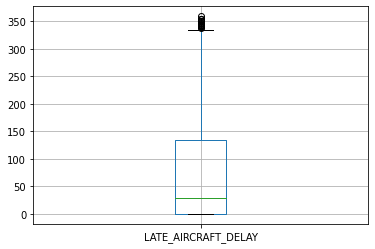

In [6]:
# Select and remove outliers from 'LATE_AIRCRAFT_DELAY'
ev_data.boxplot(column=['LATE_AIRCRAFT_DELAY'])

borders_LAD = get_outlier_min_max(ev_data['LATE_AIRCRAFT_DELAY'])
cleaned_data_late_aircraft = ev_data[(ev_data['LATE_AIRCRAFT_DELAY'] >= borders_LAD[0]) & (ev_data['LATE_AIRCRAFT_DELAY'] <= borders_LAD[1])]

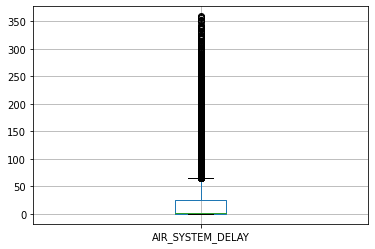

In [7]:
# Select and remove outliers from 'AIR_SYSTEM_DELAY'
ev_data.boxplot(column=['AIR_SYSTEM_DELAY'], return_type='dict')

borders_ASD = get_outlier_min_max(ev_data['AIR_SYSTEM_DELAY'])
cleaned_data_air_system = ev_data[(ev_data['AIR_SYSTEM_DELAY'] >= borders_ASD[0]) & (ev_data['AIR_SYSTEM_DELAY'] <= borders_ASD[1])]

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [8]:
def print_statistic(values, dataset_names):
    for i in range(len(dataset_names)):
        print(' ', dataset_names[i], ': ', values[i])

dataset_names = ['ev_data', 'cleaned_data_late_aircraft', 'cleaned_data_air_system']
print('\nmedian:')
print_statistic([ev_data['ARRIVAL_DELAY'].median(), cleaned_data_late_aircraft['ARRIVAL_DELAY'].median(), cleaned_data_air_system['ARRIVAL_DELAY'].median()], dataset_names)
print('\nmean:')
print_statistic([ev_data['ARRIVAL_DELAY'].mean(), cleaned_data_late_aircraft['ARRIVAL_DELAY'].mean(), cleaned_data_air_system['ARRIVAL_DELAY'].mean()], dataset_names)
print('\nmode:')
print_statistic([ev_data['ARRIVAL_DELAY'].mode()[0], cleaned_data_late_aircraft['ARRIVAL_DELAY'].mode()[0], cleaned_data_air_system['ARRIVAL_DELAY'].mode()[0]], dataset_names)
print('\nstd:')
print_statistic([ev_data['ARRIVAL_DELAY'].std(), cleaned_data_late_aircraft['ARRIVAL_DELAY'].std(), cleaned_data_air_system['ARRIVAL_DELAY'].std()], dataset_names)
print('\nvariance:')
print_statistic([ev_data['ARRIVAL_DELAY'].var(), cleaned_data_late_aircraft['ARRIVAL_DELAY'].var(), cleaned_data_air_system['ARRIVAL_DELAY'].var()], dataset_names)


median:
  ev_data :  165.0
  cleaned_data_late_aircraft :  165.0
  cleaned_data_air_system :  164.0

mean:
  ev_data :  181.5681507518063
  cleaned_data_late_aircraft :  181.25687175975742
  cleaned_data_air_system :  181.13966022261278

mode:
  ev_data :  121.0
  cleaned_data_late_aircraft :  121.0
  cleaned_data_air_system :  121.0

std:
  ev_data :  54.953399162928264
  cleaned_data_late_aircraft :  54.52686109596051
  cleaned_data_air_system :  55.03368753883122

variance:
  ev_data :  3019.876079560125
  cleaned_data_late_aircraft :  2973.1785809781722
  cleaned_data_air_system :  3028.7067641217063


    Your answer: median, mean and mode are very similar for all three datasets. However, standard deviation and variance are much lower for the air system dataset. The other two are similar 
                    
    

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

<AxesSubplot:title={'center':'Mean Arrival Delay by Month'}, xlabel='MONTH'>

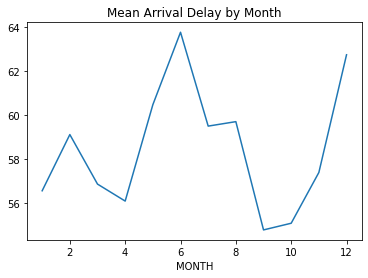

In [9]:
no_null_data.groupby(['MONTH'])['ARRIVAL_DELAY'].mean().plot(title='Mean Arrival Delay by Month')

    Your answer:
    for minimum delay, I would choose either september or october
    the worst months are june and december

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

<AxesSubplot:title={'center':'Mean Weather Delay by Month'}, xlabel='MONTH'>

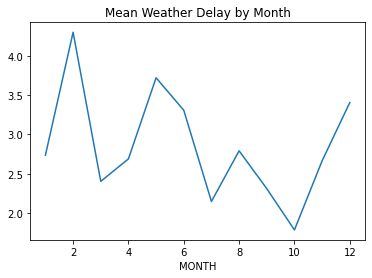

In [10]:
no_null_data.groupby(['MONTH'])['WEATHER_DELAY'].mean().plot(title='Mean Weather Delay by Month')

#### Plot for relationship between arrival delay and weather delay

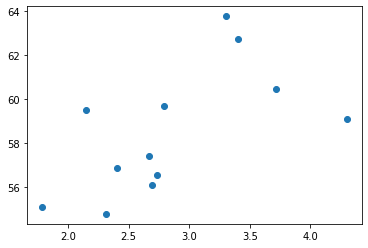

In [11]:
import matplotlib.pyplot as plt

plt.plot(no_null_data.groupby(['MONTH'])['WEATHER_DELAY'].mean(), no_null_data.groupby(['MONTH'])['ARRIVAL_DELAY'].mean(), linestyle='None', marker='o')


    Your answer: 
    minimum weather delay: October
    maximum weather delay: February

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:
    there is a slightly positive relationship between the weather delay and arrival delay with some outliers

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

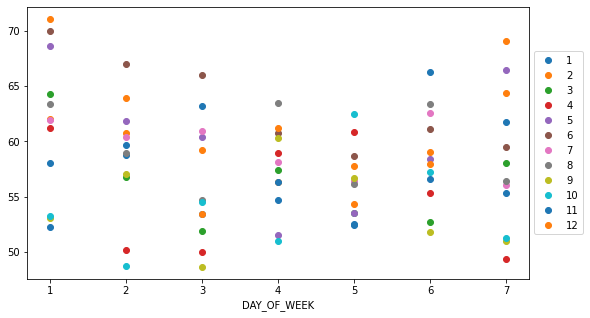

In [12]:
# I think this plot is pretty confusing :D ALso blue & orange appear twice. 
# However, you can easily see the day month combo with the longest delay, I added an alternative version below

plt.figure(figsize=[9,5])
for i in range(1, 13):
    plot = no_null_data[no_null_data['MONTH'] == i].sort_values(['MONTH','DAY_OF_WEEK']).groupby(['DAY_OF_WEEK'])['ARRIVAL_DELAY'].mean().plot(linestyle='None', marker='o')
plot.legend(range(1,13), loc='center left', bbox_to_anchor=(1, 0.5))

DAY_OF_WEEK
1    52.268114
2    59.719721
3    63.186471
4    56.336054
5    52.514517
6    66.242107
7    55.304391
Name: ARRIVAL_DELAY, dtype: float64
DAY_OF_WEEK
1    69.991555
2    66.973412
3    66.020443
4    60.787008
5    58.732197
6    61.166837
7    59.531973
Name: ARRIVAL_DELAY, dtype: float64
DAY_OF_WEEK
1    68.587684
2    61.849751
3    60.442532
4    51.505302
5    53.533745
6    58.395046
7    66.461700
Name: ARRIVAL_DELAY, dtype: float64


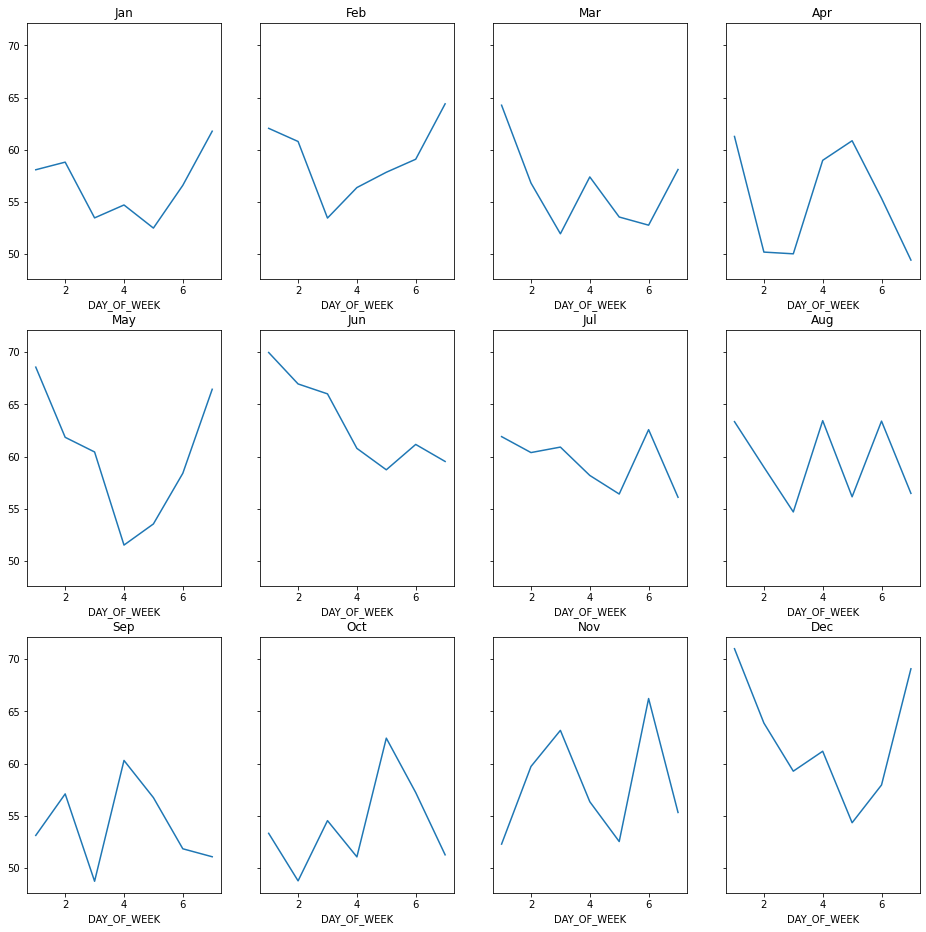

In [32]:
import matplotlib.pyplot as plt
from IPython.display import display


# compute means by month and weekday
ad_by_month_weekday = no_null_data.groupby(['MONTH', 'DAY_OF_WEEK'])['ARRIVAL_DELAY'].mean()
print(ad_by_month_weekday[11])
print(ad_by_month_weekday[6])
print(ad_by_month_weekday[5])

# plot results
fig, axes = plt.subplots( nrows=3, ncols=4, sharey=True )
fig.set_figwidth(16)
fig.set_figheight(16)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in range(3):
    for j in range(4):
        ad_by_month_weekday[i*4+j+1].plot(ax=axes[i,j])
        axes[i,j].set_title(months[i*4+j])

plt.show()

    Your answer:
    - Mondays in December
    - Mondays in June
    - Mondays in May
    - Tuesday in June
    - Sunday in December

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

(180.0, 1211.0)

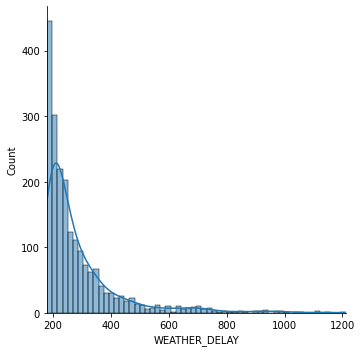

In [14]:
import seaborn as sb

sb.displot(no_null_data['WEATHER_DELAY'][no_null_data['WEATHER_DELAY'] >= 180], kde=True)
plt.xlim(180, max(no_null_data['WEATHER_DELAY']))

array([[<AxesSubplot:title={'center':'WEATHER_DELAY'}>]], dtype=object)

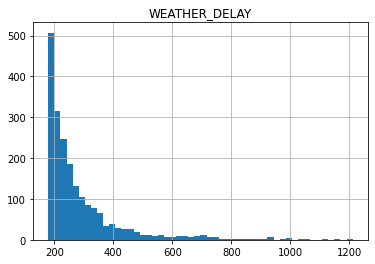

In [15]:
# Felix: Its also possible to use pandas' hist function:

wd_greater_3 = no_null_data[no_null_data['WEATHER_DELAY'] >= 3*60]
wd_greater_3.hist(column='WEATHER_DELAY', bins=50)

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

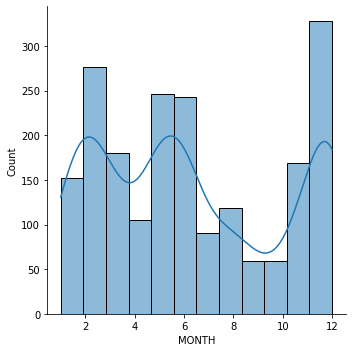

In [33]:
# Felix: I think they mean a distribution for each month

sb.displot(no_null_data[no_null_data['WEATHER_DELAY'] > 180]['MONTH'], kde=True)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>]], dtype=object)

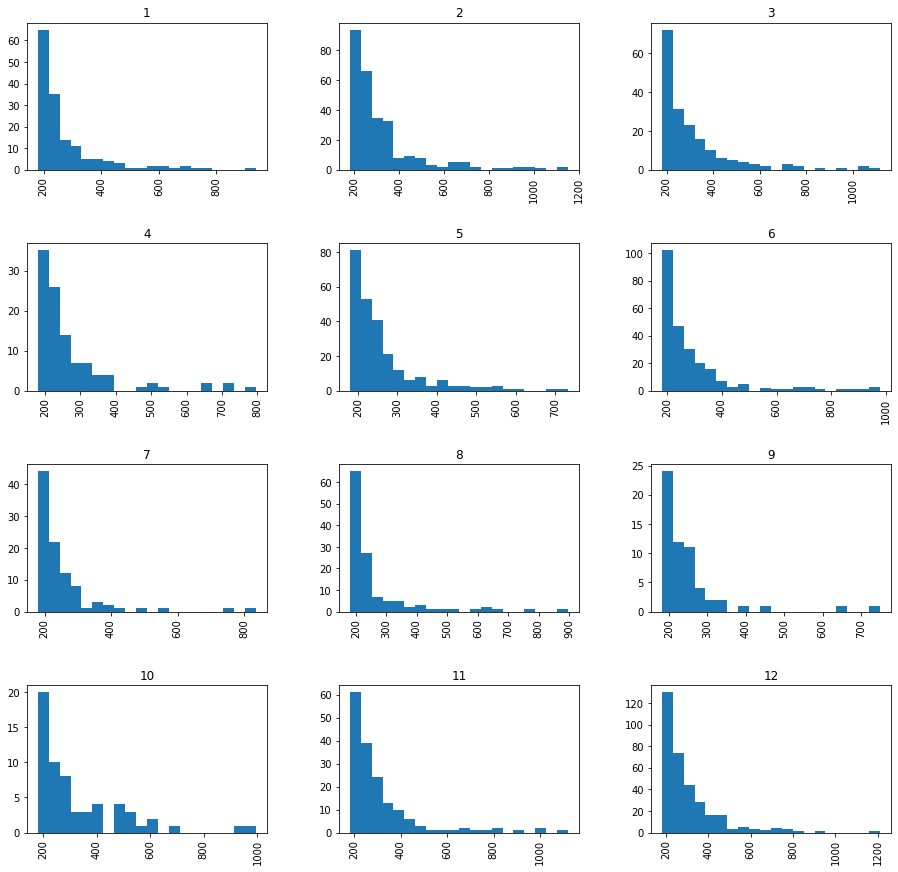

In [17]:
wd_greater_3.hist(column = 'WEATHER_DELAY', by='MONTH', figsize=(15,15), bins=20)

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

order graphs:
1. EV and VX
2. EV
3. VX


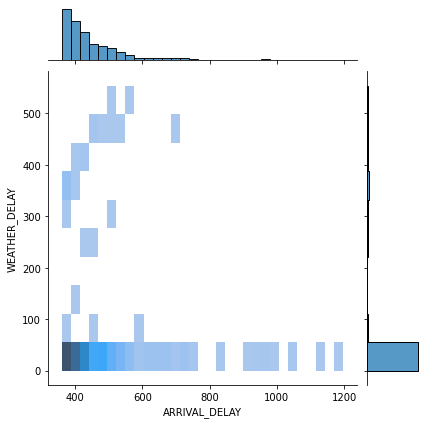

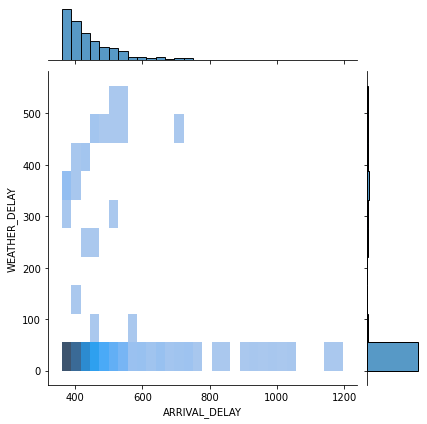

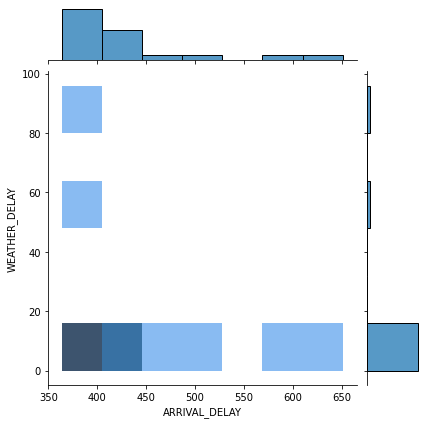

In [46]:
ad_greater_6 = no_null_data[no_null_data['ARRIVAL_DELAY'] > 6*60]
ev_vx_data = ad_greater_6[(ad_greater_6.AIRLINE == 'EV') | (ad_greater_6.AIRLINE == 'VX')]
ev_data = ad_greater_6[ad_greater_6.AIRLINE == 'EV']
vx_data = ad_greater_6[ad_greater_6.AIRLINE == 'VX']

print('order graphs:\n1. EV and VX\n2. EV\n3. VX')
sb.jointplot(data=ev_vx_data, x="ARRIVAL_DELAY", y="WEATHER_DELAY", kind="hist")
sb.jointplot(data=ev_data, x="ARRIVAL_DELAY", y="WEATHER_DELAY", kind="hist")
sb.jointplot(data=vx_data, x="ARRIVAL_DELAY", y="WEATHER_DELAY", kind="hist")

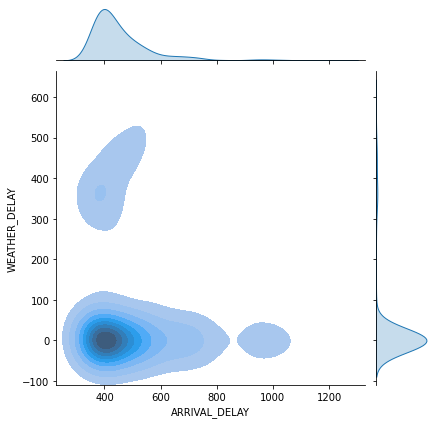

In [19]:
sb.jointplot(data=ev_vx_data, x="ARRIVAL_DELAY", y="WEATHER_DELAY", kind="kde", fill=True)

       Your answer:
       One can see 
       For airline EV, it is noticable, that the bigger the delay is, between ~360-500 min, the more linkely it is, that the delay was caused by the weather. 

## <font color="red">Todos Question 1 </font>

1. add lables to plots
2. decide on plots where there are two versions
3. flesh out text answers
4. document code
5. move imports to top??
6. double check unit of time in the dataset (minutes vs. hours), now we assume hours in 1) and minutes in 2)
7. optional: make plots more beautiful (colors, size etc.)

## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [20]:
no_null_data_UA = no_null_data[(no_null_data['AIRLINE'] == 'UA') & (no_null_data['ARRIVAL_DELAY'] != 0)]
no_null_data_UA.loc[no_null_data_UA.ARRIVAL_DELAY <= 45, 'DELAY'] = 'acceptable_delay'
no_null_data_UA.loc[no_null_data_UA.ARRIVAL_DELAY > 45, 'DELAY'] = 'unacceptable_delay'
no_null_data_UA['DISTANCE_CATEGORY'] = pd.qcut(no_null_data_UA['DISTANCE'], q=2, labels=['short', 'long'])
no_null_data_UA = no_null_data_UA.assign(DISTANCE_CATEGORY = pd.cut(no_null_data_UA['DISTANCE'], [0, no_null_data_UA.DISTANCE.max()/2, np.inf], labels=['short', 'long']))

# TDOD: length of them are not equal so maybe not equal size bins? however the documentation of qcut says: "qcut tries to divide up the underlying data into equal sized bins."

C:\Users\Daniel\.conda\envs\env-IDS2021\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Daniel\.conda\envs\env-IDS2021\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Daniel\AppData\Local\Temp/ipykernel_8432/3772846486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

In [21]:
import pip
from p_decision_tree.DecisionTree import DecisionTree

# pip.main(['install', 'p_decision_tree'])

data = no_null_data_UA[['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK', 'DELAY']]
columns = data.columns

#All columns except the last one are descriptive by default
descriptive_features = ['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK']
#The last column is considered as label
label = 'DELAY'

#Converting all the columns to string
for column in columns:
    data[column]= data[column].astype(str)

data_descriptive = data[descriptive_features].values
data_label = data[label].values

#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features, data_label, "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,1000)

# Visualizing decision tree by Graphviz
# TODO: broken library? Throws an exception💩
dot = decisionTree.print_visualTree(render=True)

# When using Jupyter
#display( dot )

C:\Users\Daniel\AppData\Local\Temp/ipykernel_8432/1107958548.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column]= data[column].astype(str)


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:
    DAY_OF_WEEK
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:
    - Flights in the afternoon and evening
    - Flights during the week


## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [22]:
# Your code
flights_classifying = pd.read_csv('./flights_classifying.csv')
flights_classifying.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,REIMBURSMENT
0,0,661456,719293,2015,7,18,6,DL,1962,N974AT,...,N,21.0,0.0,0.0,0.0,0.0,199,28,Morning,0
1,1,110441,149900,2015,6,30,2,OO,5157,N768SK,...,N,0.0,0.0,0.0,51.0,0.0,181,25,Evening,0
2,2,129096,802487,2015,5,12,2,EV,2632,N684JW,...,N,6.0,0.0,1.0,9.0,0.0,132,18,Afternoon,0
3,3,850373,443114,2015,3,26,4,B6,2324,N284JB,...,N,28.0,0.0,0.0,0.0,0.0,85,12,Morning,0
4,4,731006,116526,2015,5,30,6,MQ,3052,N622MQ,...,N,17.0,0.0,0.0,63.0,9.0,150,21,Afternoon,0


Randomly order the data points using one of the group member's students as the random state.

In [23]:
# Your code
flights_cr = flights_classifying.sample(frac=1, random_state=427492)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [ ]:
# Your code
flights_cr_clean = flights_cr[flights_cr['CANCELLED'] == False]

print(flights_cr_clean.DEPARTURE_DELAY)

flights_cr_clean.loc[flights_cr_clean.DEPARTURE_DELAY <= 180, 'DELAY>3h'] = False
flights_cr_clean.loc[flights_cr_clean.DEPARTURE_DELAY > 180, 'DELAY>3h'] = True

21946      12.0
394191     -3.0
522722     27.0
127012    149.0
9214       29.0
          ...  
199114     10.0
83976      -8.0
163323     37.0
477972     47.0
203048     -2.0
Name: DEPARTURE_DELAY, Length: 525584, dtype: float64


C:\Users\Daniel\.conda\envs\env-IDS2021\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Daniel\.conda\envs\env-IDS2021\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [ ]:
# Your code
flights_filtered = flights_cr_clean[['DAY_OF_WEEK', 'AIRLINE',  'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 
       'DISTANCE', 'DAY_YEARLY', 'SCHEDULED_DEPARTURE_CATEGORY']]
# Chosen features:
# All features, which can be obtained from future flights are chosen, because we want to predict for upcoming flights, if there is a delay or not
# DAY_OF_WEEK: can be revelant because maybe some weekdays are more prone to delays than others
# AIRLINE: maybe certain airline do have more delay than others
# ORIGIN-, DESTINATION_AIRPORT: Maybe some airports are not so well organized which can cause delay
# DISTANCE: Perhaps for long or short distances the delay is caused more often
# DAY_YEARLY: Maybe e.g. in the winter, there is usually more delay than in summer
# SCHEDULED_DEPARTURE_CATEGORY: maybe at certain times during the day, there is e.g. more traffic, causing delay

flights_descriptive_f = pd.get_dummies(flights_filtered)
print(flights_descriptive_f.columns)

Index(['DAY_OF_WEEK', 'DISTANCE', 'DAY_YEARLY', 'AIRLINE_AA', 'AIRLINE_AS',
       'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA',
       ...
       'DESTINATION_AIRPORT_VPS', 'DESTINATION_AIRPORT_WRG',
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'SCHEDULED_DEPARTURE_CATEGORY_Afternoon',
       'SCHEDULED_DEPARTURE_CATEGORY_Evening',
       'SCHEDULED_DEPARTURE_CATEGORY_Morning',
       'SCHEDULED_DEPARTURE_CATEGORY_Night'],
      dtype='object', length=667)


Split your data into training and testing data, with 85% of the dataset going to testing data.

In [ ]:
# Your code
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(flights_descriptive_f, flights_cr_clean['DELAY>3h'], test_size=0.85, random_state=42)
y_train_arr = [val for val in y_train]
y_test_arr = [val for val in y_test]

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [ ]:
#you may put code here, if necessary
len(flights_cr_clean['DELAY>3h'][flights_cr_clean['DELAY>3h'] == True]) / len(flights_cr_clean['DELAY>3h'])

0.06922775426953637

    Your answer:
    Since the goal is to save as much money as possible, when choosing a flight, it is important, that the flights, we choose are very likely to have a delay of more than 3h. The precision indicates that. It is not so relevant for us if a flight, which has a delay of more than 3h is not identified as such but on the other hand it is bad, if we incorrectly predict a flight to have a delay of >3h if it doesn't have such a delay, it is bad for us. 

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [ ]:
# Your code
from sklearn.metrics import roc_auc_score

y_pred_naiv = np.array([1 if val == True else 0 for val in y_train])
print('baseline for half of the predictions wrong and other half true')
print((np.sum(y_pred_naiv))/(len(y_pred_naiv)-np.sum(y_pred_naiv)))

baseline for half of the predictions wrong and other half true
0.07364937558730202


    Your answer:
    The baseline is 7,36%. This is because on average, if we al
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [ ]:
# Your code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 1],
              'penalty': ['l2'],
              'class_weight': [{'False': 0.001, 'True': 99.999}, 'balanced'], 'solver': ['liblinear'], }
grid_regr = GridSearchCV(LogisticRegression(), param_grid,
                         cv=5, verbose=3, scoring='precision')
grid_regr.fit(X_train, y_train_arr)
print(grid_regr.best_params_)

y_pred_regr = grid_regr.predict(X_test)
precision_score(y_test_arr, y_pred_regr)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END C=0.01, class_weight={'False': 0.001, 'True': 99.999}, penalty=l2, solver=liblinear;, score=nan total time=   0.7s
[CV 2/5] END C=0.01, class_weight={'False': 0.001, 'True': 99.999}, penalty=l2, solver=liblinear;, score=nan total time=   0.8s
[CV 3/5] END C=0.01, class_weight={'False': 0.001, 'True': 99.999}, penalty=l2, solver=liblinear;, score=nan total time=   0.8s
[CV 4/5] END C=0.01, class_weight={'False': 0.001, 'True': 99.999}, penalty=l2, solver=liblinear;, score=nan total time=   0.9s
[CV 5/5] END C=0.01, class_weight={'False': 0.001, 'True': 99.999}, penalty=l2, solver=liblinear;, score=nan total time=   0.9s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.097 total time=   1.6s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.094 total time=   1.5s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.098 t

C:\Users\Daniel\.conda\envs\env-IDS2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\env-IDS2021\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Daniel\.conda\envs\env-IDS2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1528, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\Daniel\.conda\envs\env-IDS2021\lib\site-packages\sklearn\svm\_base.py", line 1143, i

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


0.09633916657972622

#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [ ]:
# Your code
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['poly', 'rbf'], 'C': [0.1, 1], 'class_weight':['balanced']}
grid_svm = GridSearchCV(SVC(C=1), param_grid, cv = 5, verbose = 3, scoring='precision') 
grid_svm.fit(X_train[0:10000], y_train_arr[0:10000])
print(grid_svm.best_params_)

y_pred_svm = grid_svm.predict(X_test)
precision_score(y_test_arr, y_pred_svm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
X_train.loc[(y_train.index[y_train == True].tolist())]

        DAY_OF_WEEK  DISTANCE  DAY_YEARLY  AIRLINE_AA  AIRLINE_AS  AIRLINE_B6  \
548504            1       456         250           0           0           0   
551038            2      1021         335           1           0           0   
543481            3       334         322           0           0           0   
554252            4       293         155           0           0           0   
564623            4       226         358           0           0           0   
...             ...       ...         ...         ...         ...         ...   
578869            4       134         358           0           0           0   
578377            1       334         166           0           0           0   
553022            7      3711         207           1           0           0   
548880            4      1635         232           0           0           0   
574247            2       896          69           0           0           0   

        AIRLINE_DL  AIRLINE

In [ ]:
(X_train.loc[(y_train.index[y_train == False].tolist())])

,DAY_OF_WEEK,DISTANCE,DAY_YEARLY,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,...,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,SCHEDULED_DEPARTURE_CATEGORY_Afternoon,SCHEDULED_DEPARTURE_CATEGORY_Evening,SCHEDULED_DEPARTURE_CATEGORY_Morning,SCHEDULED_DEPARTURE_CATEGORY_Night
354989,1,277,110,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
345885,5,1947,352,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
497272,3,1107,245,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
466090,1,2079,355,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
104098,7,338,165,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111800,5,812,114,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
477130,5,733,128,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
476976,1,2442,180,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
411812,7,158,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [ ]:
# Your code
from sklearn.neural_network import MLPClassifier

X_train_delay_idx = y_train.index[y_train == True]
X_train_no_delay_idx = y_train.index[y_train == True]
X_train_delay_idx = X_train_delay_idx.append(X_train_no_delay_idx)

X_train_undersample = X_train.loc[list(X_train_delay_idx)]
y_train_undersample = y_train.filter(items=X_train_delay_idx, axis=0)

param_grid = {"hidden_layer_sizes":[(5,), (4,4,)], }
grid_mlp = GridSearchCV(MLPClassifier(), param_grid, cv = 5, verbose = 3, scoring='precision') 
grid_mlp.fit(X_train_undersample, y_train_undersample)
print(grid_mlp.best_params_)

y_pred_mlp = grid_mlp.predict(X_test)
precision_score(y_test_arr, y_pred_mlp)

NameError: name 'GridSearchCV' is not defined

### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

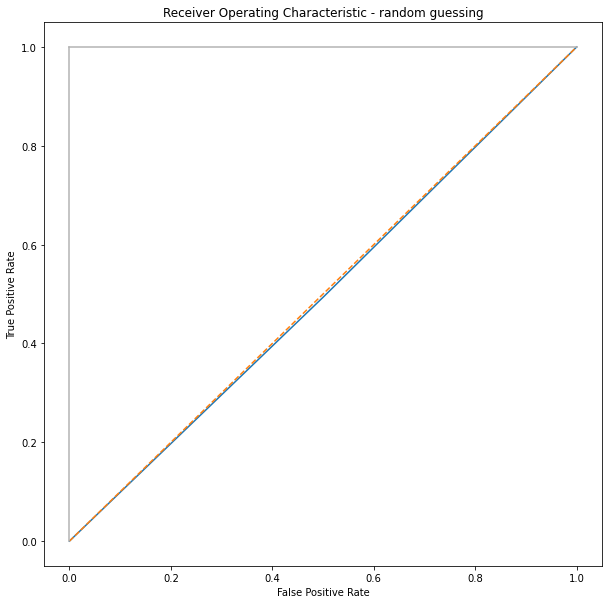

NameError: name 'roc_auc_score' is not defined

In [ ]:
# your code if needed
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import random

def plot_roc(fpr, tpr, predictor):
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - ' + predictor)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



# random guessing:
y_pred_random = [bool(random.getrandbits(1)) for val in y_test]
fpr_random, tpr_random, _ = roc_curve(y_test_arr, y_pred_random)
plot_roc(fpr_random, tpr_random, 'random guessing')
print('AUC random guessing: {}'.format(roc_auc_score(y_test_arr, y_pred_random)))

fpr_regr, tpr_regr, _ = roc_curve(y_test_arr, y_pred_regr)
plot_roc(fpr_regr, tpr_regr, 'regression')
print('AUC regression: {}'.format(roc_auc_score(y_test_arr, y_pred_regr)))

fpr_svm, tpr_svm, _ = roc_curve(y_test_arr, y_pred_svm)
plot_roc(fpr_svm, tpr_svm, 'SVM')
print('AUC SVM: {}'.format(roc_auc_score(y_test_arr, y_pred_svm)))

fpr_mlp, tpr_mlp, _ = roc_curve(y_test_arr, y_pred_mlp)
plot_roc(fpr_svm, tpr_svm, 'MLP')
print('AUC MLP: {}'.format(roc_auc_score(y_test_arr, y_pred_mlp)))

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test_arr, y_pred_regr)*150

    Your answer:
    Since the regression achieved the highest AUC out of all the classifiers, it is the best performing one.

    At a price of <=1,06€, the flight becomes profitable
    

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [ ]:
# Your code
clustering_dataset = no_null_data.loc[(no_null_data['WEATHER_DELAY'] <= 600) & (no_null_data['ARRIVAL_DELAY'] <= 600)]
clustering_dataset.head()
clustering_dataset['AIR_TIME_DELAY'] = clustering_dataset['ELAPSED_TIME'] - clustering_dataset['SCHEDULED_TIME']

print('num cols: {}'.format(len(clustering_dataset.columns)))
print('num rows: {}'.format(clustering_dataset.shape[0]))
print(clustering_dataset[['AIR_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME']].head())

num cols: 37
num rows: 807190
        AIR_TIME  SCHEDULED_TIME  ELAPSED_TIME
365815     103.0           121.0         128.0
11568      223.0           240.0         242.0
456629      82.0           109.0          98.0
861344      76.0            95.0         100.0
793411     155.0           186.0         217.0


C:\Users\Daniel\AppData\Local\Temp/ipykernel_16420/2479875736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_dataset['AIR_TIME_DELAY'] = clustering_dataset['ELAPSED_TIME'] - clustering_dataset['SCHEDULED_TIME']


    Your answer:
    A negative value for AIR_TIME_DELAY means that the flight didn't take as long as expected.

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [ ]:
# Your code
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=5).fit(clustering_dataset[['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']])
clusters = kmeans.labels_

for i in range(len(kmeans.cluster_centers_)):
    print('center: {}'.format(kmeans.cluster_centers_[i]))
    filtered_centers = [1 if item == i else 0 for item in kmeans.labels_]
    print('num samples: {}'.format(sum(filtered_centers)))

clustering_dataset['cluster'] = ['c{}'.format(label) for label in kmeans.labels_]

center: [9.26205117 1.43486177 2.44694199]
num samples: 498931
center: [ -2.93668151   1.50092925 100.82561842]
num samples: 69521
center: [-5.68773257  0.7092636  33.50753982]
num samples: 215126
center: [  9.70046948 147.21643192   8.24061033]
num samples: 8520
center: [ -4.33513082   2.7486186  223.30969975]
num samples: 15092


C:\Users\Daniel\AppData\Local\Temp/ipykernel_16420/2693489399.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_dataset['cluster'] = ['c{}'.format(label) for label in kmeans.labels_]


    Your answer:
    Because K-Means typically finds a local optimum, if you run it multiple times, the results can change. Therefore it makes sense to increase the exploration

    center 1: [-5.1059694   1.2174231  10.75419803]
    num samples: 265197
    center 2: [ -4.10171065   2.48594351 193.07896831]
    num samples: 15085
    center 3: [27.20507275  1.39975304  2.55514906]
    num samples: 130376
    center 4: [  9.19328403 147.96841895   8.08614831]
    num samples: 5001
    center 5: [-3.47993761  1.11533266 73.47445022]
    num samples: 71913

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

Text(0.5, 0, 'AIR_TIME_DELAY')

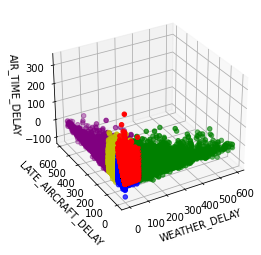

In [ ]:
# Your code
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'y',
                   2 : 'b',
                   3 : 'g',
                   4 : 'purple'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in kmeans.labels_]


fig = plt.figure()
ax = plt.axes(projection='3d')
zdata = clustering_dataset['AIR_TIME_DELAY']
xdata = clustering_dataset['WEATHER_DELAY']
ydata = clustering_dataset['LATE_AIRCRAFT_DELAY']

ax.scatter3D(xdata, ydata, zdata, c=label_color)
ax.view_init(30, -120)
ax.set_xlabel("WEATHER_DELAY")
ax.set_ylabel("LATE_AIRCRAFT_DELAY")
ax.set_zlabel("AIR_TIME_DELAY")

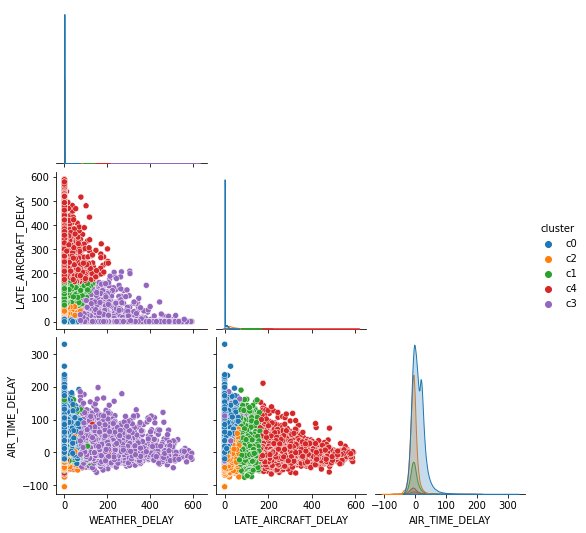

In [ ]:
import seaborn as sns

sns.pairplot(data=clustering_dataset, vars=["WEATHER_DELAY", "LATE_AIRCRAFT_DELAY", "AIR_TIME_DELAY"], hue="cluster", corner=True)

    Your answer:
    